In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import re

ANALYSIS_FOLDER = 'Experiments_Folder/VizRec/Analysis/'

In [22]:
datasets = ['movies', 'birdstrikes']
tasks = ['p1', 'p2', 'p3', 'p4']
algorithms = ['Online-SVM-Single-Model', 'WSLS-Single-Model', 'FullOfflineSVM-Single-Model', 'Momentum-Single-Model', 'Bayesian-Single-Model', 'HMM-Single-Model', 'Random-Single-Model', 'Greedy-Single-Model','QLearn-Single-Model', 'AC-Single-Model', 'Reinforce-Single-Model','SARSA-Single-Model']

combined_results = pd.DataFrame()
for dataset in datasets:
    for task in tasks:
        for algorithm in algorithms:
            #combine into the same dataframe
            print(f'Experiments_Folder/VizRec/{dataset}/{task}/{algorithm}.csv')
            file_name = f"Experiments_Folder/VizRec/{dataset}/{task}/{algorithm}.csv"

            results = pd.read_csv(file_name)
            results['Dataset'] = dataset
            results['Task'] = task
            results['Algorithm'] = algorithm
            combined_results = pd.concat([combined_results, results])

Experiments_Folder/VizRec/movies/p1/Online-SVM-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/WSLS-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/FullOfflineSVM-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/Momentum-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/Bayesian-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/HMM-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/Random-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/Greedy-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/QLearn-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/AC-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/Reinforce-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/SARSA-Single-Model.csv
Experiments_Folder/VizRec/movies/p2/Online-SVM-Single-Model.csv
Experiments_Folder/VizRec/movies/p2/WSLS-Single-Model.csv
Experiments_Folder/VizRec/movies/p2/FullOfflineSVM-Single-Model.csv
Experiments_Folder/VizRec/movies/p2/Momentum-Single-Model.csv
Experiments_Folder/

In [31]:
#trim everything before first - for the algorithm name
combined_results['Algorithm'] = combined_results['Algorithm'].apply(lambda x: x.split('-')[0])
#rename algorithm name if AC then change to Actor-Critic if Online change to Online SVM if FullOffline change to  Offline SVM
combined_results['Algorithm'] = combined_results['Algorithm'].apply(lambda x: 'Actor-Critic' if x == 'AC' else x)
combined_results['Algorithm'] = combined_results['Algorithm'].apply(lambda x: 'Online SVM' if x == 'Online' else x)
combined_results['Algorithm'] = combined_results['Algorithm'].apply(lambda x: 'Offline SVM' if x == 'FullOfflineSVM' else x)


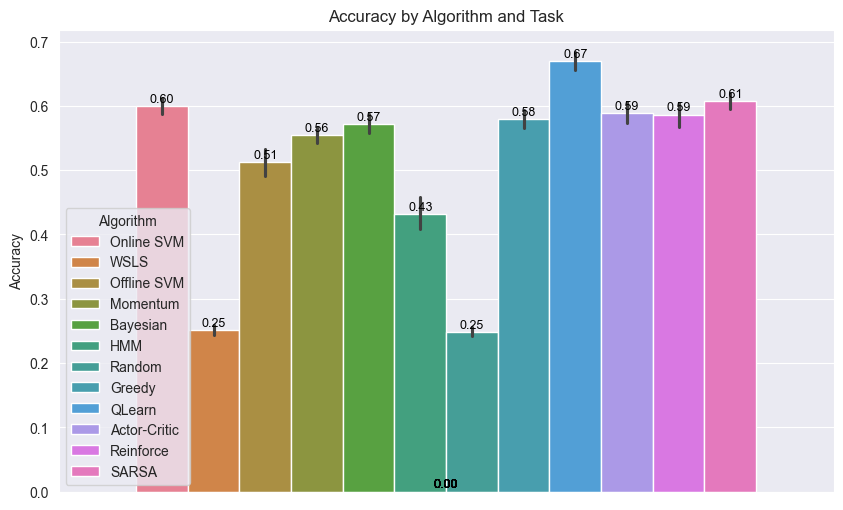

In [32]:

import seaborn as sns

def add_values_on_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=combined_results , y='Accuracy', hue='Algorithm')
plt.title('Accuracy by Algorithm and Task')
add_values_on_bars(ax)
plt.show()
# #show overlap of candle stick plot
# plt.figure(figsize=(10, 6))
# ax = sns.violinplot(data=combined_results, y='Accuracy', hue='Algorithm', split=True)
# plt.title('Accuracy by Algorithm and Task')
# plt.show()







     Algorithm 1  Algorithm 2  t-statistic        p-value
0     Online SVM         WSLS    47.200572  9.140209e-200
1     Online SVM  Offline SVM     6.945021   1.028426e-11
2     Online SVM     Momentum     4.839466   1.675446e-06
3     Online SVM     Bayesian     2.882638   4.091277e-03
4     Online SVM          HMM    11.834113   4.583969e-29
..           ...          ...          ...            ...
61        QLearn    Reinforce     6.906592   1.321237e-11
62        QLearn        SARSA     6.620257   8.245931e-11
63  Actor-Critic    Reinforce     0.234252   8.148730e-01
64  Actor-Critic        SARSA    -1.737584   8.282054e-02
65     Reinforce        SARSA    -1.786873   7.448566e-02

[66 rows x 4 columns]
T-test results saved to Experiments_Folder/VizRec/Analysis/ttest_results.csv


/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_14256/2721122112.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=combined_results, x='Algorithm', y='Accuracy', palette="tab10")


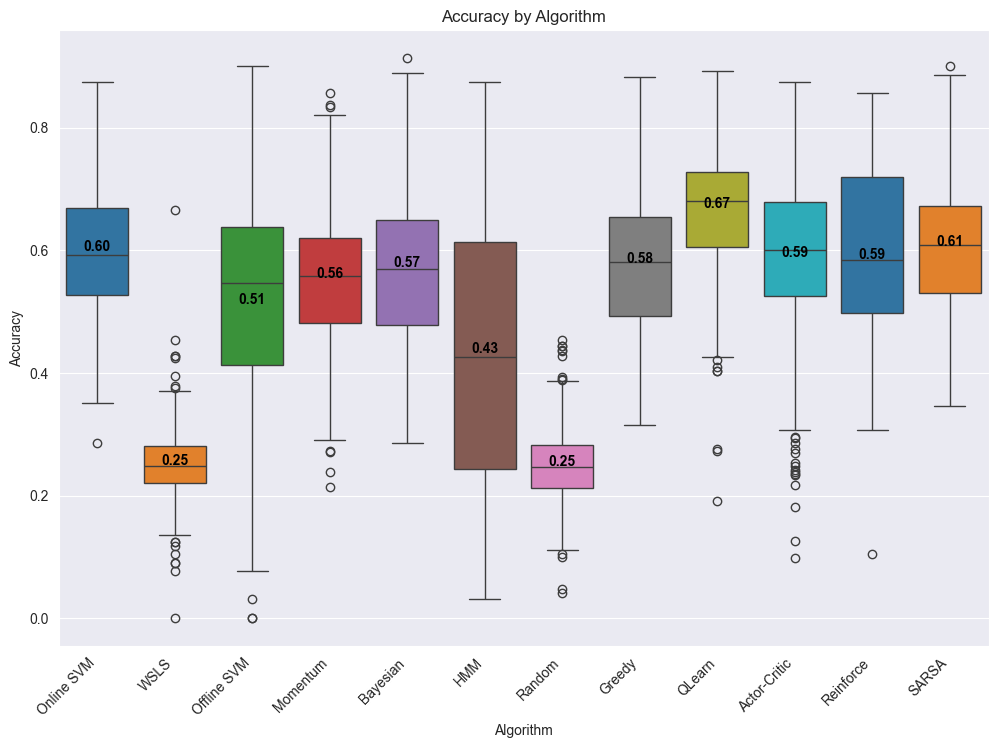

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import itertools

def plot_accuracy_with_ttest(combined_results, analysis_folder):
    # Perform pairwise t-tests between different algorithms
    algorithms = combined_results['Algorithm'].unique()
    pairs = list(itertools.combinations(algorithms, 2))  # Create pairs of algorithms for comparison

    # Store t-test results in a DataFrame
    ttest_results = []

    for pair in pairs:
        group1 = combined_results[combined_results['Algorithm'] == pair[0]]['Accuracy']
        group2 = combined_results[combined_results['Algorithm'] == pair[1]]['Accuracy']

        # Perform independent t-test
        t_stat, p_value = stats.ttest_ind(group1, group2)
        ttest_results.append({
            'Algorithm 1': pair[0],
            'Algorithm 2': pair[1],
            't-statistic': t_stat,
            'p-value': p_value
        })

    # Convert results to a DataFrame for easier visualization
    ttest_results_df = pd.DataFrame(ttest_results)
    print(ttest_results_df)  # Show the t-test results

    # Optionally, save the t-test results to a CSV file
    ttest_results_path = f'{analysis_folder}ttest_results.csv'
    ttest_results_df.to_csv(ttest_results_path, index=False)
    print(f'T-test results saved to {ttest_results_path}')

    # Create a boxplot for visual comparison
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(data=combined_results, x='Algorithm', y='Accuracy', palette="tab10")

    # Title and labels
    plt.title('Accuracy by Algorithm')
    plt.xticks(rotation=45, ha='right')

    # Add mean accuracy as text annotation on each boxplot
    means = combined_results.groupby('Algorithm')['Accuracy'].mean()
    x_ticks = ax.get_xticks()  # Get the x positions of the boxes on the plot
    for i, algorithm in enumerate(ax.get_xticklabels()):
        algorithm_name = algorithm.get_text()  # Get the algorithm name from the x-axis label
        mean_val = means[algorithm_name]
        ax.text(x_ticks[i], mean_val, f'{mean_val:.2f}',
                horizontalalignment='center', color='black', weight='semibold')

    # Save the plot
    save_path = f'{analysis_folder}Accuracy_by_Algorithm_Boxplot.png'
    plt.savefig(save_path)

    # Show the plot
    plt.show()

# Example usage:
plot_accuracy_with_ttest(combined_results, ANALYSIS_FOLDER)


In [41]:
#save the combined results to a csv
combined_results.to_csv(f'{ANALYSIS_FOLDER}GOLD-combined_results.csv', index=False)

In [42]:
combined_results.shape

(3456, 11)